In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling
import networkx as nx
import matplotlib.pyplot as plt

c:\Program Files\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
alarm_model = BayesianNetwork(
    [
        ("Burglary", "Alarm"),
        ("Earthquake", "Alarm"),
        ("Alarm", "JohnCalls"),
        ("Alarm", "MaryCalls"),
    ]
)

# Defining the parameters using CPT
from pgmpy.factors.discrete import TabularCPD

cpd_burglary = TabularCPD(
    variable="Burglary", variable_card=2, values=[[0.999], [0.001]]
)
cpd_earthquake = TabularCPD(
    variable="Earthquake", variable_card=2, values=[[0.998], [0.002]]
)
cpd_alarm = TabularCPD(
    variable="Alarm",
    variable_card=2,
    values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2],
)
cpd_johncalls = TabularCPD(
    variable="JohnCalls",
    variable_card=2,
    values=[[0.95, 0.1], [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2],
)
cpd_marycalls = TabularCPD(
    variable="MaryCalls",
    variable_card=2,
    values=[[0.1, 0.7], [0.9, 0.3]],
    evidence=["Alarm"],
    evidence_card=[2],
)

# Associating the parameters with the model structure
alarm_model.add_cpds(
    cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls
)

In [3]:
print("Bayesian Network Structure")
print(alarm_model)

Bayesian Network Structure
BayesianNetwork with 5 nodes and 4 edges


In [4]:
G=nx.DiGraph()

In [5]:
nodes=['Burglary','Earthquake','JohnCalls','MaryCalls']
edges=[('Burglary','Alarm'),('Earthquake','Alarm'),('Alarm','JohnCalls'),('Alarm','MaryCalls')]

In [6]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [7]:
pos={
    'Burglary':(0,0),
    'Earthquake':(2,0),
    'Alarm':(1,-2),
    'JohnCalls':(0,-4),
    'MaryCalls':(2,-4)
    }

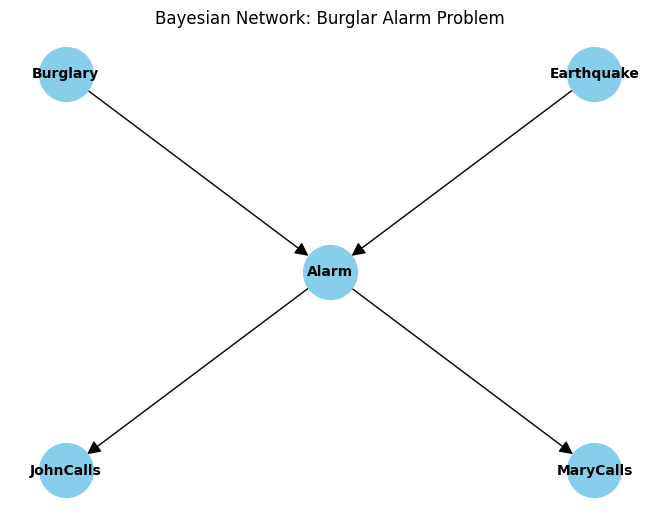

In [8]:
nx.draw(G,pos,with_labels=True,node_size=1500,node_color="skyblue",font_size=10,font_weight="bold",arrowsize=20)
plt.title("Bayesian Network: Burglar Alarm Problem")
plt.show()

In [9]:
gibbssampler=GibbsSampling(alarm_model)

In [10]:
num_samples=10000

In [11]:
samples=gibbssampler.sample(size=num_samples)

  0%|          | 0/9999 [00:00<?, ?it/s]WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


100%|██████████| 9999/9999 [00:02<00:00, 4685.54it/s]


In [12]:
query_variable="Burglary"
query_result=samples[query_variable].value_counts(normalize=True)

In [13]:
print("\n Approximate probabilities of {}:".format(query_variable))
print(query_result)


 Approximate probabilities of Burglary:
Burglary
0    0.9993
1    0.0007
Name: proportion, dtype: float64
